### House Price Prediction using California Housing Prices Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\rishb\Desktop\Bharat Intern\House Price Prediction\housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
pd.get_dummies(df['ocean_proximity'])

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [6]:
df = pd.concat([df.drop('ocean_proximity',axis=1),
                pd.get_dummies(df['ocean_proximity'])],axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [7]:
df = df[['longitude','latitude','housing_median_age','total_rooms',
            'total_bedrooms','population',
            'households','median_income',
            '<1H OCEAN',
            'INLAND','ISLAND',
            'NEAR BAY','NEAR OCEAN', 'median_house_value']]
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0,342200.0


In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,0.442636,0.317393,0.000242,0.110950,0.128779,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,0.496710,0.465473,0.015563,0.314077,0.334963,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000,0.000000,0.000000,0.000000,0.000000,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,0.000000,0.000000,0.000000,0.000000,0.000000,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,0.000000,0.000000,0.000000,0.000000,0.000000,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,1.000000,1.000000,0.000000,0.000000,0.000000,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,1.000000,1.000000,1.000000,1.000000,1.000000,500001.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   <1H OCEAN           20640 non-null  uint8  
 9   INLAND              20640 non-null  uint8  
 10  ISLAND              20640 non-null  uint8  
 11  NEAR BAY            20640 non-null  uint8  
 12  NEAR OCEAN          20640 non-null  uint8  
 13  median_house_value  20640 non-null  float64
dtypes: float64(9), uint8(5)
memory usage: 1.5 MB


In [10]:
df.shape

(20640, 14)

In [11]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
<1H OCEAN               0
INLAND                  0
ISLAND                  0
NEAR BAY                0
NEAR OCEAN              0
median_house_value      0
dtype: int64

In [12]:
df = df.dropna()
len(df)

20433

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>,
        <Axes: title={'center': 'NEAR BAY'}>],
       [<Axes: title={'center': 'NEAR OCEAN'}>,
        <Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

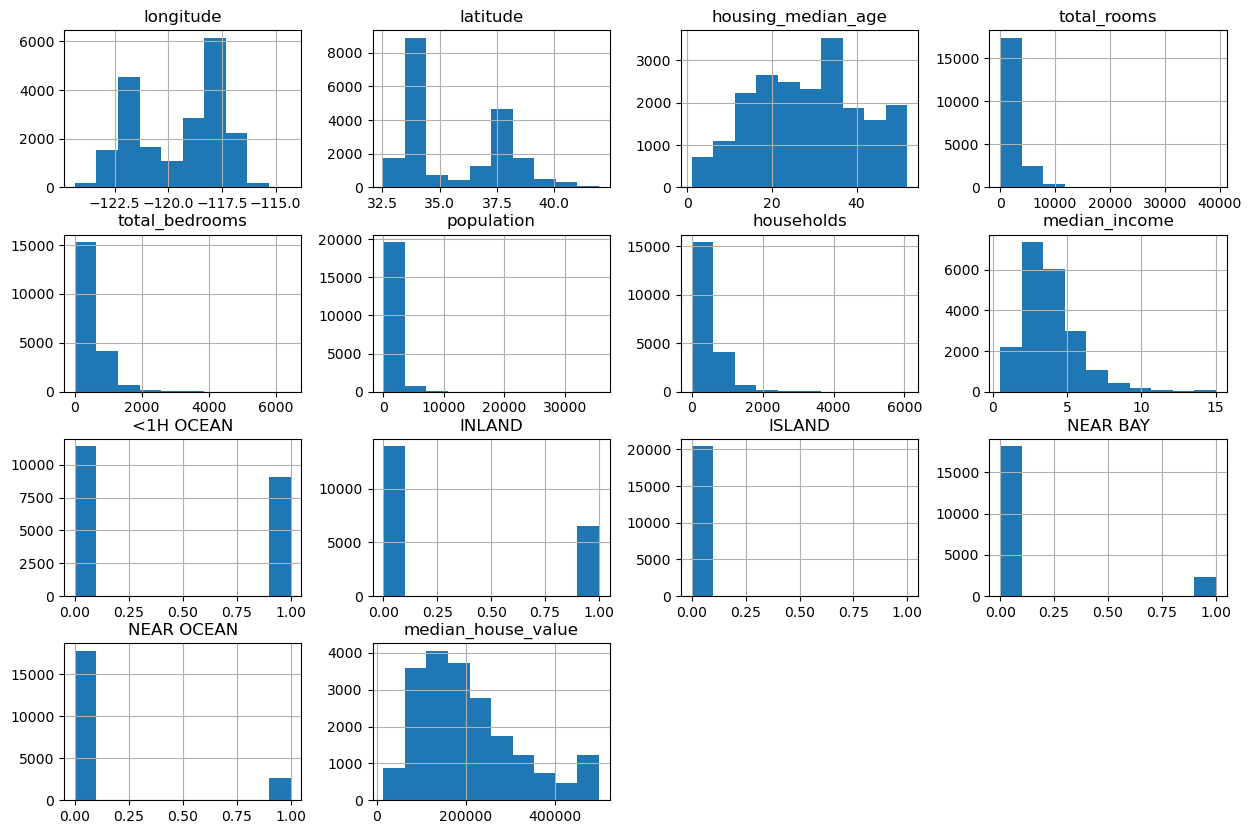

In [13]:
df.hist(figsize=(15,10))

Splitting the data into 3 sets as we're comparing different models so we want to save the test data for the very end i.e., 
for the optimal model. 

In [14]:
train_pd, test_pd, val_pd = df[:18000], df[18000:19217], df[19215:]
len(train_pd), len(test_pd), len(val_pd)

(18000, 1217, 1218)

In [15]:
X_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]
X_val, y_val = val_pd.to_numpy()[:, :-1], val_pd.to_numpy()[:, -1]
X_test, y_test = test_pd.to_numpy()[:, :-1], test_pd.to_numpy()[:, -1]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((18000, 13), (18000,), (1218, 13), (1218,), (1217, 13), (1217,))

In [16]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler().fit(X_train[:, :8])

def preprocessor(X):
    A = np.copy(X)
    A[:, :8] = scaler.transform(A[:, :8])
    return A

X_train, X_val, X_test = preprocessor(X_train), preprocessor(X_val), preprocessor(X_test)

In [17]:
X_train.shape, X_val.shape, X_test.shape

((18000, 13), (1218, 13), (1217, 13))

<Axes: >

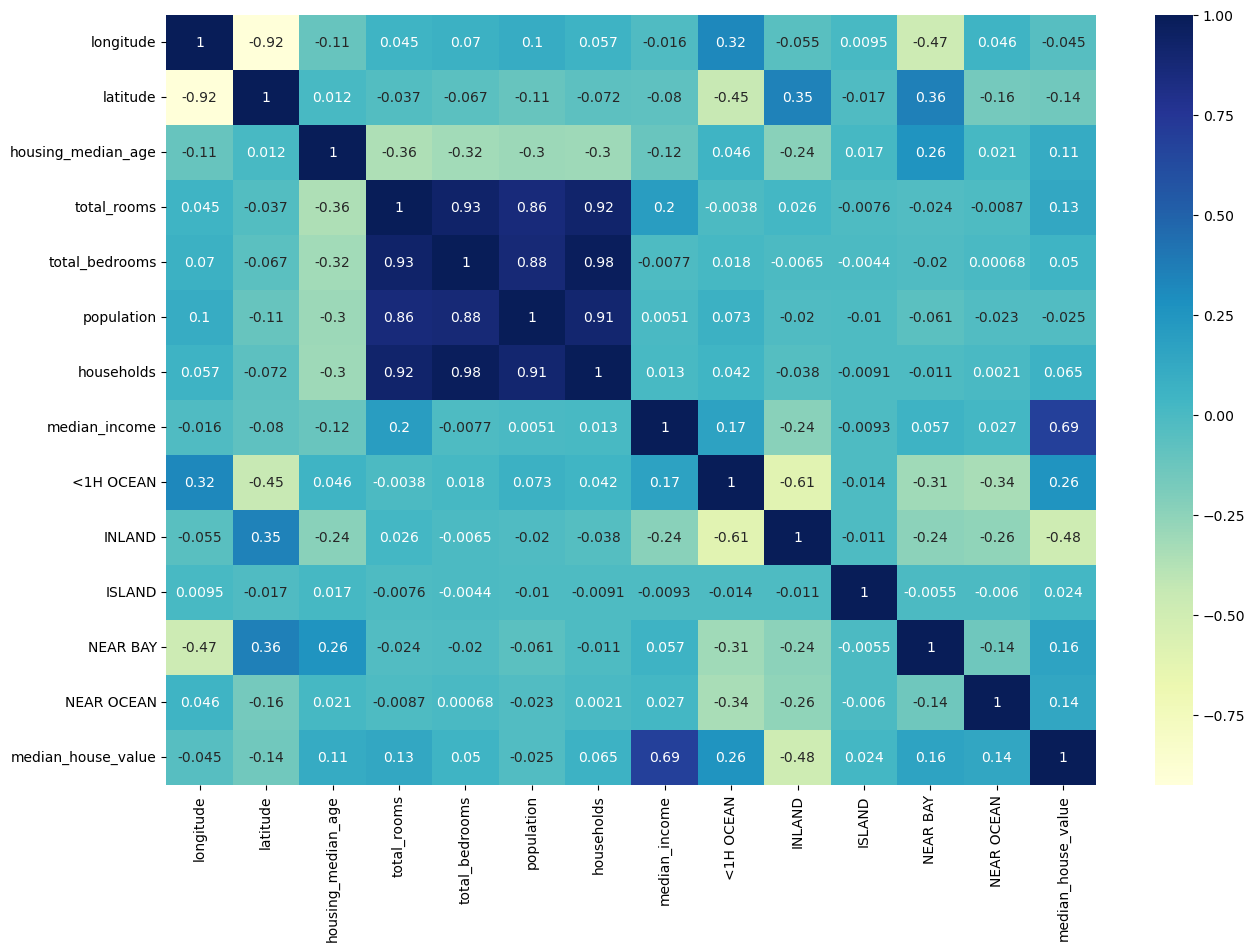

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

In [19]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(X_train, y_train)
mse(lm.predict(X_train), y_train, squared=False), mse(lm.predict(X_val), y_val, squared=False)

(69708.7008419755, 53805.65992509067)

In [20]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10).fit(X_train, y_train)
mse(knn.predict(X_train), y_train, squared=False), mse(knn.predict(X_val), y_val, squared=False)

(53885.21865117171, 52788.32880186733)

In [21]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=10).fit(X_train, y_train)
mse(rfr.predict(X_train), y_train, squared=False), mse(rfr.predict(X_val), y_val, squared=False)

(42950.425480083104, 57739.265936739066)

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=250).fit(X_train, y_train)
mse(gbr.predict(X_train), y_train, squared=False), mse(gbr.predict(X_val), y_val, squared=False)

(46531.496661409874, 51289.73346643205)

In [23]:
# We can say that RFR is the most optimal since it performs better on testing data than training data compared to other models

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

simple_nn = Sequential()
simple_nn.add(InputLayer((13,)))
simple_nn.add(Dense(2, 'relu'))
simple_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/simple_nn', save_best_only=True)
simple_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
simple_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)



Epoch 1/100

562/563 [============================>.] - ETA: 0s - loss: 52464824320.0000 - root_mean_squared_error: 229052.0156INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 5s 6ms/step - loss: 52445474816.0000 - root_mean_squared_error: 229009.7656 - val_loss: 23291504640.0000 - val_root_mean_squared_error: 152615.5469
Epoch 2/100
557/563 [============================>.] - ETA: 0s - loss: 33963542528.0000 - root_mean_squared_error: 184292.0000INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 33858162688.0000 - root_mean_squared_error: 184005.8750 - val_loss: 11849710592.0000 - val_root_mean_squared_error: 108856.3750
Epoch 3/100
558/563 [============================>.] - ETA: 0s - loss: 14675362816.0000 - root_mean_squared_error: 121141.9141INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 14611188736.0000 - root_mean_squared_error: 120876.7500 - val_loss: 3836333312.0000 - val_root_mean_squared_error: 61938.1406
Epoch 4/100
563/563 [==============================] - ETA: 0s - loss: 6354408960.0000 - root_mean_squared_error: 79714.5469INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 6354408960.0000 - root_mean_squared_error: 79714.5469 - val_loss: 3121791232.0000 - val_root_mean_squared_error: 55872.9922
Epoch 5/100
559/563 [============================>.] - ETA: 0s - loss: 5229516288.0000 - root_mean_squared_error: 72315.3984INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 5238291968.0000 - root_mean_squared_error: 72376.0469 - val_loss: 2967933952.0000 - val_root_mean_squared_error: 54478.7461
Epoch 6/100
561/563 [============================>.] - ETA: 0s - loss: 5025403904.0000 - root_mean_squared_error: 70890.0859INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 5026971136.0000 - root_mean_squared_error: 70901.1328 - val_loss: 2855219200.0000 - val_root_mean_squared_error: 53434.2500
Epoch 7/100
547/563 [============================>.] - ETA: 0s - loss: 4939208192.0000 - root_mean_squared_error: 70279.5000INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 4ms/step - loss: 4949007360.0000 - root_mean_squared_error: 70349.1797 - val_loss: 2819932416.0000 - val_root_mean_squared_error: 53103.0352
Epoch 8/100
555/563 [============================>.] - ETA: 0s - loss: 4906588672.0000 - root_mean_squared_error: 70047.0469INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4909910016.0000 - root_mean_squared_error: 70070.7500 - val_loss: 2796743168.0000 - val_root_mean_squared_error: 52884.2422
Epoch 9/100
563/563 [==============================] - 2s 3ms/step - loss: 4884317184.0000 - root_mean_squared_error: 69887.8906 - val_loss: 2796903168.0000 - val_root_mean_squared_error: 52885.7539
Epoch 10/100
563/563 [==============================] - 2s 3ms/step - loss: 4866920960.0000 - root_mean_squared_error: 69763.3203 - val_loss: 2801869056.0000 - val_root_mean_squared_error: 52932.6836
Epoch 11/100
563/563 [==============================] - 2s 3ms/step - loss: 4850987008.0000 - root_mean_squared_error: 69649.0234 - val_loss: 2812476160.0000 - val_root_mean_squared_error: 53032.7852
Epoch 12/100
563/563 [==============================] - 2s 3ms/step - loss: 4841242112.0000 - root_mean_squared_error: 69579.0312 - val_loss: 2804631296.0000 - val_root_mean_squared_error: 52958.7695
Epoch 13/100
5

INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4768188928.0000 - root_mean_squared_error: 69052.0703 - val_loss: 2790385408.0000 - val_root_mean_squared_error: 52824.0977
Epoch 36/100
563/563 [==============================] - 2s 3ms/step - loss: 4766781952.0000 - root_mean_squared_error: 69041.8828 - val_loss: 2817409792.0000 - val_root_mean_squared_error: 53079.2773
Epoch 37/100
563/563 [==============================] - 2s 3ms/step - loss: 4765121536.0000 - root_mean_squared_error: 69029.8594 - val_loss: 2804622592.0000 - val_root_mean_squared_error: 52958.6875
Epoch 38/100
550/563 [============================>.] - ETA: 0s - loss: 4759073280.0000 - root_mean_squared_error: 68986.0391INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4761550848.0000 - root_mean_squared_error: 69003.9922 - val_loss: 2782185728.0000 - val_root_mean_squared_error: 52746.4297
Epoch 39/100
563/563 [==============================] - 2s 3ms/step - loss: 4759053824.0000 - root_mean_squared_error: 68985.8984 - val_loss: 2786546432.0000 - val_root_mean_squared_error: 52787.7500
Epoch 40/100
554/563 [============================>.] - ETA: 0s - loss: 4760546816.0000 - root_mean_squared_error: 68996.7188INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4756121600.0000 - root_mean_squared_error: 68964.6406 - val_loss: 2767520256.0000 - val_root_mean_squared_error: 52607.2266
Epoch 41/100
553/563 [============================>.] - ETA: 0s - loss: 4765531648.0000 - root_mean_squared_error: 69032.8281INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4754284032.0000 - root_mean_squared_error: 68951.3125 - val_loss: 2756187136.0000 - val_root_mean_squared_error: 52499.4023
Epoch 42/100
563/563 [==============================] - 2s 3ms/step - loss: 4749535232.0000 - root_mean_squared_error: 68916.8750 - val_loss: 2756619264.0000 - val_root_mean_squared_error: 52503.5156
Epoch 43/100
556/563 [============================>.] - ETA: 0s - loss: 4759477760.0000 - root_mean_squared_error: 68988.9688INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4744982528.0000 - root_mean_squared_error: 68883.8359 - val_loss: 2738884864.0000 - val_root_mean_squared_error: 52334.3555
Epoch 44/100
546/563 [============================>.] - ETA: 0s - loss: 4735607808.0000 - root_mean_squared_error: 68815.7500INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4735992320.0000 - root_mean_squared_error: 68818.5469 - val_loss: 2725049856.0000 - val_root_mean_squared_error: 52202.0117
Epoch 45/100
548/563 [============================>.] - ETA: 0s - loss: 4726967296.0000 - root_mean_squared_error: 68752.9453INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4728660480.0000 - root_mean_squared_error: 68765.2578 - val_loss: 2700953344.0000 - val_root_mean_squared_error: 51970.6953
Epoch 46/100
548/563 [============================>.] - ETA: 0s - loss: 4719459328.0000 - root_mean_squared_error: 68698.3203INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4721168896.0000 - root_mean_squared_error: 68710.7656 - val_loss: 2696082688.0000 - val_root_mean_squared_error: 51923.8164
Epoch 47/100
552/563 [============================>.] - ETA: 0s - loss: 4724131840.0000 - root_mean_squared_error: 68732.3203INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4709429760.0000 - root_mean_squared_error: 68625.2812 - val_loss: 2649817344.0000 - val_root_mean_squared_error: 51476.3750
Epoch 48/100
558/563 [============================>.] - ETA: 0s - loss: 4695703040.0000 - root_mean_squared_error: 68525.2031INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4699076608.0000 - root_mean_squared_error: 68549.8125 - val_loss: 2627723520.0000 - val_root_mean_squared_error: 51261.3242
Epoch 49/100
554/563 [============================>.] - ETA: 0s - loss: 4691026432.0000 - root_mean_squared_error: 68491.0703INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4686935040.0000 - root_mean_squared_error: 68461.1953 - val_loss: 2618822400.0000 - val_root_mean_squared_error: 51174.4297
Epoch 50/100
560/563 [============================>.] - ETA: 0s - loss: 4673993216.0000 - root_mean_squared_error: 68366.6094INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4675341824.0000 - root_mean_squared_error: 68376.4688 - val_loss: 2600706304.0000 - val_root_mean_squared_error: 50997.1211
Epoch 51/100
553/563 [============================>.] - ETA: 0s - loss: 4677165056.0000 - root_mean_squared_error: 68389.8047INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4662258688.0000 - root_mean_squared_error: 68280.7344 - val_loss: 2593865216.0000 - val_root_mean_squared_error: 50930.0039
Epoch 52/100
563/563 [==============================] - 2s 3ms/step - loss: 4653993472.0000 - root_mean_squared_error: 68220.1875 - val_loss: 2596158208.0000 - val_root_mean_squared_error: 50952.5078
Epoch 53/100
558/563 [============================>.] - ETA: 0s - loss: 4653337600.0000 - root_mean_squared_error: 68215.3750INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4644807680.0000 - root_mean_squared_error: 68152.8281 - val_loss: 2575072768.0000 - val_root_mean_squared_error: 50745.1758
Epoch 54/100
563/563 [==============================] - 2s 3ms/step - loss: 4635216384.0000 - root_mean_squared_error: 68082.4219 - val_loss: 2592093952.0000 - val_root_mean_squared_error: 50912.6094
Epoch 55/100
549/563 [============================>.] - ETA: 0s - loss: 4631556608.0000 - root_mean_squared_error: 68055.5391INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4630159360.0000 - root_mean_squared_error: 68045.2734 - val_loss: 2574511104.0000 - val_root_mean_squared_error: 50739.6406
Epoch 56/100
562/563 [============================>.] - ETA: 0s - loss: 4623596032.0000 - root_mean_squared_error: 67997.0312INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4620847104.0000 - root_mean_squared_error: 67976.8125 - val_loss: 2572712704.0000 - val_root_mean_squared_error: 50721.9141
Epoch 57/100
563/563 [==============================] - 2s 3ms/step - loss: 4614821888.0000 - root_mean_squared_error: 67932.4766 - val_loss: 2583894528.0000 - val_root_mean_squared_error: 50832.0234
Epoch 58/100
563/563 [==============================] - 2s 3ms/step - loss: 4607975424.0000 - root_mean_squared_error: 67882.0703 - val_loss: 2576565504.0000 - val_root_mean_squared_error: 50759.8789
Epoch 59/100
563/563 [==============================] - 2s 3ms/step - loss: 4601740288.0000 - root_mean_squared_error: 67836.1250 - val_loss: 2582912768.0000 - val_root_mean_squared_error: 50822.3633
Epoch 60/100
563/563 [==============================] - 2s 3ms/step - loss: 4595085824.0000 - root_mean_squared_error: 67787.0625 - val_loss: 2577396992.0000 - val_root_mean_squared_error: 50768.0703
Epoch 61/100


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4589274112.0000 - root_mean_squared_error: 67744.1797 - val_loss: 2566737408.0000 - val_root_mean_squared_error: 50662.9805
Epoch 62/100
559/563 [============================>.] - ETA: 0s - loss: 4579353088.0000 - root_mean_squared_error: 67670.9141INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4583478784.0000 - root_mean_squared_error: 67701.3906 - val_loss: 2564922880.0000 - val_root_mean_squared_error: 50645.0664
Epoch 63/100
555/563 [============================>.] - ETA: 0s - loss: 4572155392.0000 - root_mean_squared_error: 67617.7188INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4577868800.0000 - root_mean_squared_error: 67659.9531 - val_loss: 2549383424.0000 - val_root_mean_squared_error: 50491.4180
Epoch 64/100
563/563 [==============================] - 2s 3ms/step - loss: 4573203968.0000 - root_mean_squared_error: 67625.4688 - val_loss: 2566454016.0000 - val_root_mean_squared_error: 50660.1836
Epoch 65/100
554/563 [============================>.] - ETA: 0s - loss: 4578535424.0000 - root_mean_squared_error: 67664.8750INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4566897664.0000 - root_mean_squared_error: 67578.8281 - val_loss: 2544406784.0000 - val_root_mean_squared_error: 50442.1133
Epoch 66/100
563/563 [==============================] - 2s 3ms/step - loss: 4560718336.0000 - root_mean_squared_error: 67533.0938 - val_loss: 2580770560.0000 - val_root_mean_squared_error: 50801.2852
Epoch 67/100
563/563 [==============================] - 2s 3ms/step - loss: 4558379520.0000 - root_mean_squared_error: 67515.7734 - val_loss: 2548086272.0000 - val_root_mean_squared_error: 50478.5742
Epoch 68/100
563/563 [==============================] - 2s 3ms/step - loss: 4552264192.0000 - root_mean_squared_error: 67470.4688 - val_loss: 2550881536.0000 - val_root_mean_squared_error: 50506.2539
Epoch 69/100
563/563 [==============================] - 2s 3ms/step - loss: 4545098240.0000 - root_mean_squared_error: 67417.3438 - val_loss: 2571517184.0000 - val_root_mean_squared_error: 50710.1289
Epoch 70/100


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4536054784.0000 - root_mean_squared_error: 67350.2422 - val_loss: 2528506880.0000 - val_root_mean_squared_error: 50284.2617
Epoch 72/100
563/563 [==============================] - 2s 3ms/step - loss: 4532861440.0000 - root_mean_squared_error: 67326.5312 - val_loss: 2530983424.0000 - val_root_mean_squared_error: 50308.8789
Epoch 73/100
563/563 [==============================] - 2s 3ms/step - loss: 4526533120.0000 - root_mean_squared_error: 67279.5156 - val_loss: 2549225984.0000 - val_root_mean_squared_error: 50489.8594
Epoch 74/100
563/563 [==============================] - 2s 3ms/step - loss: 4521343488.0000 - root_mean_squared_error: 67240.9375 - val_loss: 2544933632.0000 - val_root_mean_squared_error: 50447.3359
Epoch 75/100
563/563 [==============================] - 2s 3ms/step - loss: 4515384832.0000 - root_mean_squared_error: 67196.6094 - val_loss: 2536215552.0000 - val_root_mean_squared_error: 50360.8516
Epoch 76/100


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4502611456.0000 - root_mean_squared_error: 67101.5000 - val_loss: 2525034496.0000 - val_root_mean_squared_error: 50249.7227
Epoch 78/100
563/563 [==============================] - 2s 3ms/step - loss: 4496651264.0000 - root_mean_squared_error: 67057.0781 - val_loss: 2531384832.0000 - val_root_mean_squared_error: 50312.8711
Epoch 79/100
546/563 [============================>.] - ETA: 0s - loss: 4486021632.0000 - root_mean_squared_error: 66977.7734INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4489594880.0000 - root_mean_squared_error: 67004.4375 - val_loss: 2517279488.0000 - val_root_mean_squared_error: 50172.4961
Epoch 80/100
552/563 [============================>.] - ETA: 0s - loss: 4478887424.0000 - root_mean_squared_error: 66924.4922INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4484090368.0000 - root_mean_squared_error: 66963.3516 - val_loss: 2514761216.0000 - val_root_mean_squared_error: 50147.3945
Epoch 81/100
547/563 [============================>.] - ETA: 0s - loss: 4483773440.0000 - root_mean_squared_error: 66960.9844INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4477010944.0000 - root_mean_squared_error: 66910.4688 - val_loss: 2507588864.0000 - val_root_mean_squared_error: 50075.8320
Epoch 82/100
563/563 [==============================] - 2s 3ms/step - loss: 4471565312.0000 - root_mean_squared_error: 66869.7656 - val_loss: 2523258368.0000 - val_root_mean_squared_error: 50232.0469
Epoch 83/100
563/563 [==============================] - 2s 3ms/step - loss: 4465942016.0000 - root_mean_squared_error: 66827.7031 - val_loss: 2513924608.0000 - val_root_mean_squared_error: 50139.0508
Epoch 84/100
558/563 [============================>.] - ETA: 0s - loss: 4465021440.0000 - root_mean_squared_error: 66820.8125INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4459873280.0000 - root_mean_squared_error: 66782.2812 - val_loss: 2493745664.0000 - val_root_mean_squared_error: 49937.4180
Epoch 85/100
563/563 [==============================] - 2s 3ms/step - loss: 4455290368.0000 - root_mean_squared_error: 66747.9609 - val_loss: 2530117376.0000 - val_root_mean_squared_error: 50300.2734
Epoch 86/100
563/563 [==============================] - 2s 3ms/step - loss: 4450773504.0000 - root_mean_squared_error: 66714.1172 - val_loss: 2504937472.0000 - val_root_mean_squared_error: 50049.3516
Epoch 87/100
563/563 [==============================] - 2s 3ms/step - loss: 4444164608.0000 - root_mean_squared_error: 66664.5703 - val_loss: 2508620288.0000 - val_root_mean_squared_error: 50086.1289
Epoch 88/100
563/563 [==============================] - 2s 3ms/step - loss: 4440251392.0000 - root_mean_squared_error: 66635.2109 - val_loss: 2511665920.0000 - val_root_mean_squared_error: 50116.5234
Epoch 89/100


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4426060800.0000 - root_mean_squared_error: 66528.6484 - val_loss: 2480585984.0000 - val_root_mean_squared_error: 49805.4805
Epoch 93/100
563/563 [==============================] - 2s 3ms/step - loss: 4424215040.0000 - root_mean_squared_error: 66514.7734 - val_loss: 2489810432.0000 - val_root_mean_squared_error: 49898.0000
Epoch 94/100
563/563 [==============================] - 2s 3ms/step - loss: 4421356032.0000 - root_mean_squared_error: 66493.2812 - val_loss: 2483672064.0000 - val_root_mean_squared_error: 49836.4531
Epoch 95/100
563/563 [==============================] - 2s 3ms/step - loss: 4418255872.0000 - root_mean_squared_error: 66469.9609 - val_loss: 2494822400.0000 - val_root_mean_squared_error: 49948.1953
Epoch 96/100
556/563 [============================>.] - ETA: 0s - loss: 4415378432.0000 - root_mean_squared_error: 66448.3125INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4414709760.0000 - root_mean_squared_error: 66443.2812 - val_loss: 2465040128.0000 - val_root_mean_squared_error: 49649.1719
Epoch 97/100
563/563 [==============================] - 2s 3ms/step - loss: 4414664192.0000 - root_mean_squared_error: 66442.9375 - val_loss: 2500483328.0000 - val_root_mean_squared_error: 50004.8320
Epoch 98/100
563/563 [==============================] - 2s 3ms/step - loss: 4409741312.0000 - root_mean_squared_error: 66405.8828 - val_loss: 2480136960.0000 - val_root_mean_squared_error: 49800.9727
Epoch 99/100
563/563 [==============================] - 2s 3ms/step - loss: 4408752128.0000 - root_mean_squared_error: 66398.4375 - val_loss: 2492982784.0000 - val_root_mean_squared_error: 49929.7773
Epoch 100/100
563/563 [==============================] - 2s 3ms/step - loss: 4404961792.0000 - root_mean_squared_error: 66369.8828 - val_loss: 2468103936.0000 - val_root_mean_squared_error: 49680.0156


In [25]:
from tensorflow.keras.models import load_model

simple_nn = load_model('models/simple_nn')
mse(simple_nn.predict(X_train), y_train, squared=False), mse(simple_nn.predict(X_val), y_val, squared=False)

39/39 [==============================] - 0s 3ms/step


(66448.42188918877, 49649.17141118205)

In [26]:
medium_nn = Sequential()
medium_nn.add(InputLayer((13,)))
medium_nn.add(Dense(32, 'relu'))
medium_nn.add(Dense(16, 'relu'))
medium_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/medium_nn', save_best_only=True)
medium_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
medium_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
560/563 [============================>.] - ETA: 0s - loss: 8931159040.0000 - root_mean_squared_error: 94504.8125INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 5s 6ms/step - loss: 8910302208.0000 - root_mean_squared_error: 94394.3984 - val_loss: 2571515648.0000 - val_root_mean_squared_error: 50710.1133
Epoch 2/100
558/563 [============================>.] - ETA: 0s - loss: 4616466944.0000 - root_mean_squared_error: 67944.5859INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4611188224.0000 - root_mean_squared_error: 67905.7266 - val_loss: 2366723840.0000 - val_root_mean_squared_error: 48648.9844
Epoch 3/100
563/563 [==============================] - 2s 3ms/step - loss: 4503880704.0000 - root_mean_squared_error: 67110.9609 - val_loss: 2587452160.0000 - val_root_mean_squared_error: 50867.0039
Epoch 4/100
563/563 [==============================] - 2s 3ms/step - loss: 4446737920.0000 - root_mean_squared_error: 66683.8672 - val_loss: 2398584832.0000 - val_root_mean_squared_error: 48975.3477
Epoch 5/100
563/563 [==============================] - 2s 3ms/step - loss: 4380563456.0000 - root_mean_squared_error: 66185.8281 - val_loss: 2471195136.0000 - val_root_mean_squared_error: 49711.1172
Epoch 6/100
563/563 [==============================] - 2s 3ms/step - loss: 4349000704.0000 - root_mean_squared_error: 65946.9531 - val_loss: 2404686848.0000 - val_root_mean_squared_error: 49037.6055
Epoch 7/100
563/5

INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4211255040.0000 - root_mean_squared_error: 64894.1836 - val_loss: 2295264000.0000 - val_root_mean_squared_error: 47908.9141
Epoch 11/100
563/563 [==============================] - 2s 3ms/step - loss: 4227685632.0000 - root_mean_squared_error: 65020.6562 - val_loss: 2532087296.0000 - val_root_mean_squared_error: 50319.8516
Epoch 12/100
563/563 [==============================] - 2s 3ms/step - loss: 4171276800.0000 - root_mean_squared_error: 64585.4219 - val_loss: 2442874624.0000 - val_root_mean_squared_error: 49425.4453
Epoch 13/100
548/563 [============================>.] - ETA: 0s - loss: 4200727552.0000 - root_mean_squared_error: 64813.0195INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4191484416.0000 - root_mean_squared_error: 64741.6758 - val_loss: 2277832192.0000 - val_root_mean_squared_error: 47726.6406
Epoch 14/100
559/563 [============================>.] - ETA: 0s - loss: 4167895040.0000 - root_mean_squared_error: 64559.2383INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4162535936.0000 - root_mean_squared_error: 64517.7188 - val_loss: 2237662208.0000 - val_root_mean_squared_error: 47303.9336
Epoch 15/100
563/563 [==============================] - 2s 3ms/step - loss: 4168687616.0000 - root_mean_squared_error: 64565.3750 - val_loss: 2360628992.0000 - val_root_mean_squared_error: 48586.3047
Epoch 16/100
563/563 [==============================] - 2s 3ms/step - loss: 4148434176.0000 - root_mean_squared_error: 64408.3398 - val_loss: 2378576128.0000 - val_root_mean_squared_error: 48770.6484
Epoch 17/100
563/563 [==============================] - 2s 3ms/step - loss: 4144113920.0000 - root_mean_squared_error: 64374.7930 - val_loss: 2322045952.0000 - val_root_mean_squared_error: 48187.6133
Epoch 18/100
563/563 [==============================] - 2s 3ms/step - loss: 4126473216.0000 - root_mean_squared_error: 64237.6289 - val_loss: 2253645312.0000 - val_root_mean_squared_error: 47472.5742
Epoch 19/100


In [27]:
medium_nn = load_model('models/medium_nn')
mse(medium_nn.predict(X_train), y_train, squared=False), mse(medium_nn.predict(X_val), y_val, squared=False)

39/39 [==============================] - 0s 3ms/step


(63798.66659180252, 47303.93559837605)

In [28]:
large_nn = Sequential()
large_nn.add(InputLayer((13,)))
large_nn.add(Dense(256, 'relu'))
large_nn.add(Dense(128, 'relu'))
large_nn.add(Dense(64, 'relu'))
large_nn.add(Dense(32, 'relu'))
large_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/large_nn', save_best_only=True)
large_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
large_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
554/563 [============================>.] - ETA: 0s - loss: 6372177408.0000 - root_mean_squared_error: 79825.9219INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 6s 7ms/step - loss: 6347209728.0000 - root_mean_squared_error: 79669.3750 - val_loss: 2468908288.0000 - val_root_mean_squared_error: 49688.1094
Epoch 2/100
554/563 [============================>.] - ETA: 0s - loss: 4506287104.0000 - root_mean_squared_error: 67128.8828INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 4s 7ms/step - loss: 4499207680.0000 - root_mean_squared_error: 67076.1328 - val_loss: 2371379968.0000 - val_root_mean_squared_error: 48696.8164
Epoch 3/100
563/563 [==============================] - 2s 4ms/step - loss: 4035642368.0000 - root_mean_squared_error: 63526.7070 - val_loss: 2487474176.0000 - val_root_mean_squared_error: 49874.5859
Epoch 4/100
563/563 [==============================] - 2s 4ms/step - loss: 3983261184.0000 - root_mean_squared_error: 63113.0820 - val_loss: 2692073216.0000 - val_root_mean_squared_error: 51885.1914
Epoch 5/100
563/563 [==============================] - 2s 4ms/step - loss: 3959636992.0000 - root_mean_squared_error: 62925.6484 - val_loss: 3182839808.0000 - val_root_mean_squared_error: 56416.6641
Epoch 6/100
563/563 [==============================] - 2s 4ms/step - loss: 3620600064.0000 - root_mean_squared_error: 60171.4219 - val_loss: 4323426304.0000 - val_root_mean_squared_error: 65752.7656
Epoch 7/100
561/5

INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 4s 7ms/step - loss: 3672416256.0000 - root_mean_squared_error: 60600.4648 - val_loss: 2140777216.0000 - val_root_mean_squared_error: 46268.5352
Epoch 8/100
563/563 [==============================] - 2s 4ms/step - loss: 3350896896.0000 - root_mean_squared_error: 57886.9336 - val_loss: 2315876608.0000 - val_root_mean_squared_error: 48123.5547
Epoch 9/100
563/563 [==============================] - 2s 4ms/step - loss: 3291617024.0000 - root_mean_squared_error: 57372.6172 - val_loss: 2240240640.0000 - val_root_mean_squared_error: 47331.1797
Epoch 10/100
563/563 [==============================] - 2s 4ms/step - loss: 3289062912.0000 - root_mean_squared_error: 57350.3516 - val_loss: 2288216064.0000 - val_root_mean_squared_error: 47835.3008
Epoch 11/100
563/563 [==============================] - 2s 4ms/step - loss: 3223375360.0000 - root_mean_squared_error: 56774.7773 - val_loss: 2538647040.0000 - val_root_mean_squared_error: 50384.9883
Epoch 12/100
56

In [29]:
large_nn = load_model('models/large_nn')
mse(large_nn.predict(X_train), y_train, squared=False), mse(large_nn.predict(X_val), y_val, squared=False)

39/39 [==============================] - 0s 3ms/step


(55890.99301630544, 46268.53416585762)

In [30]:
mse(gbr.predict(X_test), y_test, squared=False)

60708.666563218954

In [37]:
input_data = (-120,40,50,1000,250,3000,450,6.5342,0,0,0,1,0)
input_data_numpy = np.asarray(input_data)
input_data_reshaped = input_data_numpy.reshape(1,-1)
prediction = gbr.predict(input_data_reshaped)

print('Predicted price:', prediction[0])

Predicted price: 365429.47887104354
